In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
car = pd.read_csv("https://github.com/shabbar88/LATEST-DATA--SCIENCE/raw/main/Cars.csv")

In [3]:
car.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [11]:
car.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [12]:
car.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

<ipython-input-21-582df3208f4a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'WT',y = 'MPG',data = car,palette = 'Set1',color='red');


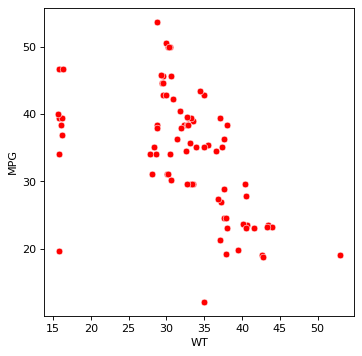

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5),dpi=80);
sns.scatterplot(x = 'WT',y = 'MPG',data = car,palette = 'Set1',color='red');

                 CORRELATION


**-1.......-0.5......0.......0.5.......1**

In [22]:
car.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


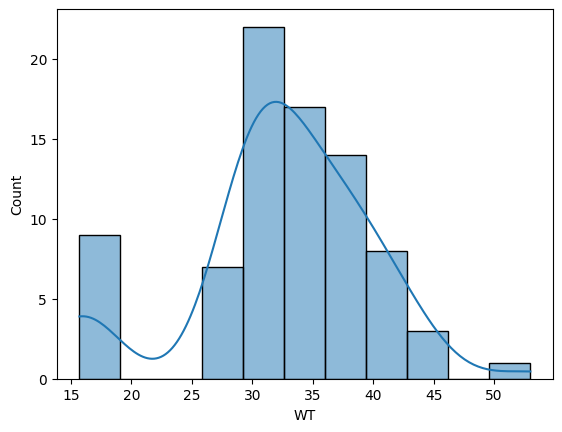

In [26]:
import seaborn as sns
sns.histplot(car['WT'],kde=True);

<Axes: xlabel='MPG', ylabel='Count'>

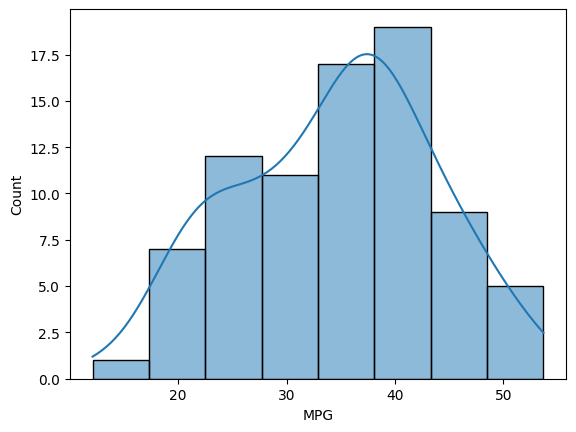

In [27]:
import seaborn as sns
sns.histplot(car['MPG'],kde=True)

# Fitting a linear regresson model

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf


In [5]:
#OLS=Ordinary Least Squares
model = smf.ols("MPG~WT",data = car).fit()

<Axes: xlabel='WT', ylabel='MPG'>

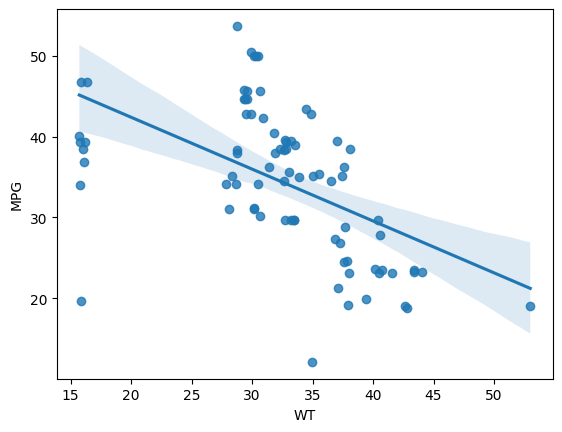

In [6]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="WT", y="MPG", data=car)

In [7]:
#Coefficients
#Interpretation for Beta Coefficient of WT
#For every unit increase in the WT  value, the value for Sunday MPG will decrease by -0.641958
model.params

Intercept    55.229590
WT           -0.641958
dtype: float64

In [8]:
model.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

In [9]:
car.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [28]:
car.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# y = B0 + B1*X1 + e
# y = c  +  m*x

In [30]:
model.params

Intercept    55.229590
WT           -0.641958
dtype: float64

In [31]:
55.229590+28.762059*-0.641958

36.765556128477996

In [33]:
55.229590+30.466833*-0.641958

35.671162820986

In [34]:
55.229590+30.193597*-0.641958

35.846568857074004

In [35]:
55.229590+30.632114*-0.641958

35.565059360788

In [36]:
55.229590+29.889149*-0.641958

36.042011686258

In [37]:
#To see the model predictions
model.fittedvalues

0     36.765555
1     35.671162
2     35.846568
3     35.565058
4     36.042011
        ...    
76    44.872915
77    30.884543
78    45.106152
79    29.921615
80    32.794046
Length: 81, dtype: float64

# y = B0 + B1*X1 + e
# B0 - Intercept
# B1 - Slope
# X1 - Independent data point
# e (error) - Vertical distance between the actual 'MPG' value & the MPG fitted value

In [38]:
car['Predicted']=model.fittedvalues
car[0:5]

,HP,MPG,VOL,SP,WT,Predicted
0,49,53.700681,89,104.185353,28.762059,36.765555
1,55,50.013401,92,105.461264,30.466833,35.671162
2,55,50.013401,92,105.461264,30.193597,35.846568
3,70,45.696322,92,113.461264,30.632114,35.565058
4,53,50.504232,92,104.461264,29.889149,36.042011


In [39]:
#For Manual Calculations
car['Predicted1']=55.229590 + (-0.641958 * car['WT'])
car[0:5]

,HP,MPG,VOL,SP,WT,Predicted,Predicted1
0,49,53.700681,89,104.185353,28.762059,36.765555,36.765556
1,55,50.013401,92,105.461264,30.466833,35.671162,35.671163
2,55,50.013401,92,105.461264,30.193597,35.846568,35.846569
3,70,45.696322,92,113.461264,30.632114,35.565058,35.565059
4,53,50.504232,92,104.461264,29.889149,36.042011,36.042012


In [40]:
#To generate the residual values
#Difference between Actual & Fitted Values
car['Error']=model.resid
car[0:5]

,HP,MPG,VOL,SP,WT,Predicted,Predicted1,Error
0,49,53.700681,89,104.185353,28.762059,36.765555,36.765556,16.935126
1,55,50.013401,92,105.461264,30.466833,35.671162,35.671163,14.342239
2,55,50.013401,92,105.461264,30.193597,35.846568,35.846569,14.166833
3,70,45.696322,92,113.461264,30.632114,35.565058,35.565059,10.131264
4,53,50.504232,92,104.461264,29.889149,36.042011,36.042012,14.462221


In [41]:
car['Error1']=car['MPG'] - car['Predicted']
car[0:5]

,HP,MPG,VOL,SP,WT,Predicted,Predicted1,Error,Error1
0,49,53.700681,89,104.185353,28.762059,36.765555,36.765556,16.935126,16.935126
1,55,50.013401,92,105.461264,30.466833,35.671162,35.671163,14.342239,14.342239
2,55,50.013401,92,105.461264,30.193597,35.846568,35.846569,14.166833,14.166833
3,70,45.696322,92,113.461264,30.632114,35.565058,35.565059,10.131264,10.131264
4,53,50.504232,92,104.461264,29.889149,36.042011,36.042012,14.462221,14.462221


In [42]:
car['Error_Sq']=(car['Error'])**2
car[0:5]

,HP,MPG,VOL,SP,WT,Predicted,Predicted1,Error,Error1,Error_Sq
0,49,53.700681,89,104.185353,28.762059,36.765555,36.765556,16.935126,16.935126,286.798502
1,55,50.013401,92,105.461264,30.466833,35.671162,35.671163,14.342239,14.342239,205.699833
2,55,50.013401,92,105.461264,30.193597,35.846568,35.846569,14.166833,14.166833,200.699162
3,70,45.696322,92,113.461264,30.632114,35.565058,35.565059,10.131264,10.131264,102.642513
4,53,50.504232,92,104.461264,29.889149,36.042011,36.042012,14.462221,14.462221,209.155838


In [43]:
#Y = B0 + B1*X + e
#c=13.835630
#m=1.339715
car['Predicted1']=55.229590 + (-0.641958 * car['WT'])
car['Y']= 55.229590 + (-0.641958 * car['WT']) + car['Error']
car[0:5]

,HP,MPG,VOL,SP,WT,Predicted,Predicted1,Error,Error1,Error_Sq,Y
0,49,53.700681,89,104.185353,28.762059,36.765555,36.765556,16.935126,16.935126,286.798502,53.700682
1,55,50.013401,92,105.461264,30.466833,35.671162,35.671163,14.342239,14.342239,205.699833,50.013402
2,55,50.013401,92,105.461264,30.193597,35.846568,35.846569,14.166833,14.166833,200.699162,50.013402
3,70,45.696322,92,113.461264,30.632114,35.565058,35.565059,10.131264,10.131264,102.642513,45.696324
4,53,50.504232,92,104.461264,29.889149,36.042011,36.042012,14.462221,14.462221,209.155838,50.504233


In [44]:
Mean_Squared_Error=car['Error_Sq'].mean()
Mean_Squared_Error

59.50271099831563

In [45]:
model.rsquared
#27.74% of variation in the dependent variable is explained by the given independent variable

0.2774751389270127

In [46]:
#Null Hypothesis - WT  doesn't affect the MPG significantly.
#Alternate Hypothesis - WT significantly affects the MPG.

#Since p-value is less then 0.05 for 'WT' variable,
#We can say that it is a significant variable in predicting the dependent variable 'MPG'
model.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

# PREDICT FOR NEW DATA POINT

In [47]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,215,326,412])
newdata

0    200
1    300
2    215
3    326
4    412
dtype: int64

In [48]:
car_test=pd.DataFrame(newdata,columns=['WT'])
car_test

,WT
0,200
1,300
2,215
3,326
4,412


In [49]:
model.predict(car_test)

0    -73.162017
1   -137.357821
2    -82.791388
3   -154.048730
4   -209.257121
dtype: float64

In [50]:
car.head()

,HP,MPG,VOL,SP,WT,Predicted,Predicted1,Error,Error1,Error_Sq,Y
0,49,53.700681,89,104.185353,28.762059,36.765555,36.765556,16.935126,16.935126,286.798502,53.700682
1,55,50.013401,92,105.461264,30.466833,35.671162,35.671163,14.342239,14.342239,205.699833,50.013402
2,55,50.013401,92,105.461264,30.193597,35.846568,35.846569,14.166833,14.166833,200.699162,50.013402
3,70,45.696322,92,113.461264,30.632114,35.565058,35.565059,10.131264,10.131264,102.642513,45.696324
4,53,50.504232,92,104.461264,29.889149,36.042011,36.042012,14.462221,14.462221,209.155838,50.504233


In [51]:
car_test['predicted']=model.predict(car_test)
car_test

,WT,predicted
0,200,-73.162017
1,300,-137.357821
2,215,-82.791388
3,326,-154.048730
4,412,-209.257121
